In this section, the necessary libraries are imported. These libraries include pandas for data manipulation, scikit-learn for machine learning models (Ridge and RandomForestRegressor), mean_squared_error for calculating mean squared error, and matplotlib for data visualization.

In [2]:
# Import required libraries
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


The code reads a CSV file named "local_weather till 18_06.csv" and uses the "DATE" column as the index for the DataFrame.

In [3]:
# Load data
weather = pd.read_csv("local_weather till 18_06.csv", index_col="DATE")

This line calculates the proportion of missing values for each column in the "weather" DataFrame.

In [4]:
weather.apply(pd.isnull).sum()/(weather.shape[0])*100

STATION     0.000000
NAME        0.000000
ACMH       66.340283
ACSH       66.340283
AWND       50.731483
DAPR       99.953922
FMTM       87.386246
FRGT       99.988481
MDPR       99.953922
PGTM       50.967630
PRCP        1.624237
SNOW       34.454556
SNWD       33.740352
TAVG       88.267481
TMAX        0.063357
TMIN        0.080636
TSUN       93.370579
WDF1       66.340283
WDF2       50.725723
WDF5       51.232577
WDFG       75.423338
WSF1       66.340283
WSF2       50.719963
WSF5       51.232577
WSFG       75.423338
WT01       77.790577
WT02       98.024421
WT03       99.251238
WT04       99.976961
WT05       99.832969
WT07       99.988481
WT08       81.373114
WT09       99.988481
WT16       88.739777
WT18       99.982721
dtype: float64

Here, a subset of columns from the "weather" DataFrame is selected, and their names are renamed for easier understanding. These columns represent precipitation, snowfall, snow depth, maximum temperature, and minimum temperature.

In [5]:
core_weather = weather[["PRCP", "SNOW", "SNWD", "TMAX", "TMIN"]].copy()
core_weather.columns = ["precip", "snow", "snow_depth", "temp_max", "temp_min"]
core_weather

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1960-01-01,0.0,0.0,0.0,49.0,30.0
1960-01-02,0.0,0.0,0.0,49.0,29.0
1960-01-03,0.0,0.0,0.0,54.0,35.0
1960-01-04,0.0,0.0,0.0,54.0,36.0
1960-01-05,0.0,0.0,0.0,55.0,33.0
...,...,...,...,...,...
2023-06-10,0.0,NaN,NaN,65.0,54.0
2023-06-11,0.0,NaN,NaN,67.0,55.0
2023-06-12,0.0,NaN,NaN,69.0,57.0


The below line calculates the number of missing values in each column of the "core_weather" DataFrame.

In [6]:
core_weather.apply(pd.isnull).sum()

precip         282
snow          5982
snow_depth    5858
temp_max        11
temp_min        14
dtype: int64

In [7]:
core_weather["snow"].value_counts()
core_weather["snow_depth"].value_counts()

0.0    11504
Name: snow_depth, dtype: int64

The below lines remove the "snow" and "snow_depth" columns from the "core_weather" DataFrame.

In [8]:
del core_weather["snow"]
del core_weather["snow_depth"]

This line filters rows where the "precip" column has missing values.

In [9]:
core_weather[pd.isnull(core_weather["precip"])]

,precip,temp_max,temp_min
DATE,,,
1983-10-29,NaN,67.0,57.0
1983-10-30,NaN,70.0,63.0
1983-10-31,NaN,69.0,61.0
1983-11-12,NaN,63.0,55.0
1983-11-13,NaN,60.0,50.0
...,...,...,...
2016-05-01,NaN,80.0,55.0
2016-05-02,NaN,68.0,53.0
2016-05-08,NaN,67.0,56.0


This line retrieves the data for the specified date, "2013-12-15".

In [10]:
core_weather.loc["2013-12-15", :]

precip       NaN
temp_max    58.0
temp_min    33.0
Name: 2013-12-15, dtype: float64

the code calculates the relative frequency of each unique value in the "precip" column

In [11]:
core_weather["precip"].value_counts() / core_weather.shape[0]

0.00    0.811254
0.01    0.025515
0.02    0.011635
0.03    0.007142
0.04    0.006048
          ...   
1.05    0.000058
1.38    0.000058
1.95    0.000058
2.01    0.000058
1.28    0.000058
Name: precip, Length: 179, dtype: float64

This line fills the missing values in the "precip" column with zeros.

In [12]:
core_weather["precip"] = core_weather["precip"].fillna(0)

In [13]:
core_weather.apply(pd.isnull).sum()

precip       0
temp_max    11
temp_min    14
dtype: int64

This line checks for missing values again in the DataFrame after the filling operation.

In [14]:
core_weather[pd.isnull(core_weather["temp_min"])]

,precip,temp_max,temp_min
DATE,,,
2004-11-20,0.0,NaN,NaN
2011-12-21,0.0,61.0,NaN
2011-12-22,0.0,62.0,NaN
2011-12-23,0.0,56.0,NaN
2011-12-24,0.0,55.0,NaN
2011-12-25,0.0,54.0,NaN
2013-06-16,0.0,NaN,NaN
2020-08-29,0.0,NaN,NaN
2020-09-08,0.0,NaN,NaN


This line filters rows where the "temp_min" column has missing values.

In [15]:
core_weather.loc["2011-12-18":"2011-12-28"]

,precip,temp_max,temp_min
DATE,,,
2011-12-18,0.0,52.0,33.0
2011-12-19,0.0,55.0,35.0
2011-12-20,0.0,61.0,35.0
2011-12-21,0.0,61.0,NaN
2011-12-22,0.0,62.0,NaN
2011-12-23,0.0,56.0,NaN
2011-12-24,0.0,55.0,NaN
2011-12-25,0.0,54.0,NaN
2011-12-26,0.0,50.0,32.0


This line retrieves data for a specific date range, from "2011-12-18" to "2011-12-28".

In [16]:
core_weather = core_weather.fillna(method="ffill")

The missing values in the DataFrame are filled using the forward-fill method, where missing values are replaced with the most recent available value.

In [17]:
core_weather.apply(pd.isnull).sum()

precip      0
temp_max    0
temp_min    0
dtype: int64

checking the null values in respective columns

In [18]:
# Check for missing value defined in data documentation
core_weather.apply(lambda x: (x == 9999).sum())
print(core_weather.dtypes)

precip      float64
temp_max    float64
temp_min    float64
dtype: object


This line calculates the count of values equal to 9999 in each column of the DataFrame and line prints the data types of columns in the DataFrame.

In [19]:
core_weather.index

Index(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04', '1960-01-05',
       '1960-01-06', '1960-01-07', '1960-01-08', '1960-01-09', '1960-01-10',
       ...
       '2023-06-05', '2023-06-06', '2023-06-07', '2023-06-08', '2023-06-09',
       '2023-06-10', '2023-06-11', '2023-06-12', '2023-06-13', '2023-06-14'],
      dtype='object', name='DATE', length=17362)

This line retrieves the index (dates) of the DataFrame.

In [20]:
core_weather.index = pd.to_datetime(core_weather.index)
print(core_weather.index)
core_weather.index.year

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2023-06-05', '2023-06-06', '2023-06-07', '2023-06-08',
               '2023-06-09', '2023-06-10', '2023-06-11', '2023-06-12',
               '2023-06-13', '2023-06-14'],
              dtype='datetime64[ns]', name='DATE', length=17362, freq=None)


Int64Index([1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960,
            ...
            2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023],
           dtype='int64', name='DATE', length=17362)

The index (dates) of the DataFrame is converted to a datetime format and line extracts the year component from the index (dates) of the DataFrame.

<Axes: xlabel='DATE'>

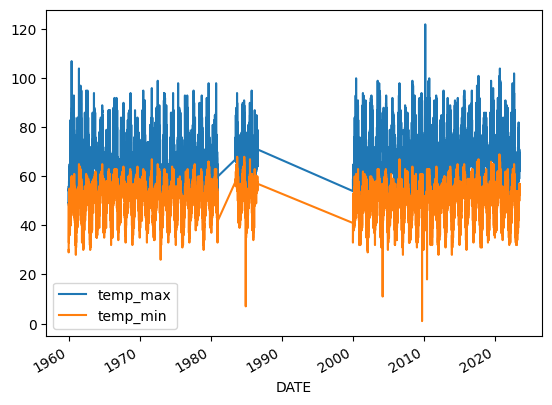

In [21]:
core_weather[["temp_max", "temp_min"]].plot()

This line creates a plot of the "temp_max" and "temp_min" columns over time.

In [22]:
core_weather.index.year.value_counts().sort_index()

1960    366
1961    365
1962    365
1963    365
1964    366
1965    365
1966    365
1967    365
1968    366
1969    365
1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1983    184
1984    366
1985    365
1986    212
2000    365
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    365
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
2023    165
Name: DATE, dtype: int64

This line counts the occurrences of each year in the index and sorts them in ascending order.

<Axes: xlabel='DATE'>

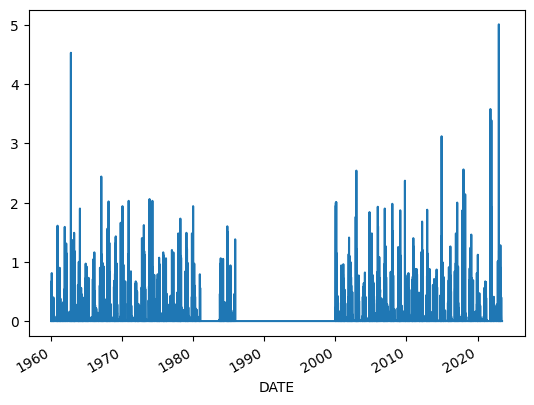

In [23]:
core_weather["precip"].plot()

This line creates a plot of the "precip" column over time.

            precip  temp_max  temp_min  target
DATE                                          
1960-01-01     0.0      49.0      30.0    49.0
1960-01-02     0.0      49.0      29.0    54.0
1960-01-03     0.0      54.0      35.0    54.0
1960-01-04     0.0      54.0      36.0    55.0
1960-01-05     0.0      55.0      33.0    53.0
...            ...       ...       ...     ...
2023-06-10     0.0      65.0      54.0    67.0
2023-06-11     0.0      67.0      55.0    69.0
2023-06-12     0.0      69.0      57.0    67.0
2023-06-13     0.0      67.0      56.0    68.0
2023-06-14     0.0      68.0      54.0     NaN

[17362 rows x 4 columns]


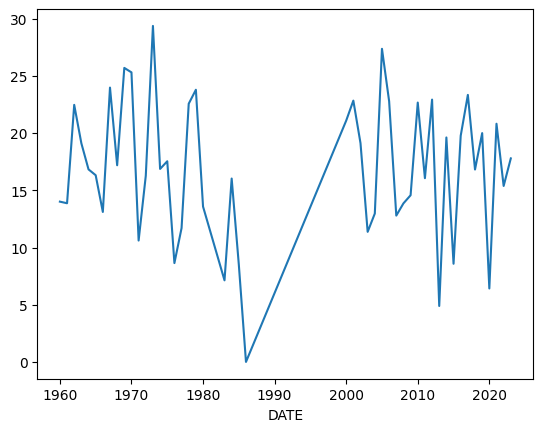

In [24]:
core_weather.groupby(core_weather.index.year).apply(lambda x: x["precip"].sum()).plot()
core_weather["target"] = core_weather.shift(-1)["temp_max"]
print(core_weather)

This line groups the data by year and calculates the sum of precipitation for each year. Then, it creates a plot of the yearly precipitation totals.
A new column "target" is created by shifting the "temp_max" values one step forward. This effectively prepares the data for predicting the next day's maximum temperature based on the current day's features.

In [25]:
core_weather = core_weather.iloc[:-1,:].copy()
print(core_weather)

            precip  temp_max  temp_min  target
DATE                                          
1960-01-01     0.0      49.0      30.0    49.0
1960-01-02     0.0      49.0      29.0    54.0
1960-01-03     0.0      54.0      35.0    54.0
1960-01-04     0.0      54.0      36.0    55.0
1960-01-05     0.0      55.0      33.0    53.0
...            ...       ...       ...     ...
2023-06-09     0.0      66.0      55.0    65.0
2023-06-10     0.0      65.0      54.0    67.0
2023-06-11     0.0      67.0      55.0    69.0
2023-06-12     0.0      69.0      57.0    67.0
2023-06-13     0.0      67.0      56.0    68.0

[17361 rows x 4 columns]


The last row of the DataFrame is removed to align the target values properly with the features.

In [26]:
# Model 1: Ridge Regression
reg = Ridge(alpha=0.1)
predictors = ["precip", "temp_max", "temp_min"]
train = core_weather.loc[:"2020-12-31"]
test = core_weather.loc["2021-01-01":]
reg.fit(train[predictors], train["target"])
ridge_predictions = reg.predict(test[predictors])
ridge_mse = mean_squared_error(test["target"], ridge_predictions)


In this section, a Ridge Regression model is trained and evaluated. Features ("precip", "temp_max", "temp_min") are selected. The data is split into training and testing sets based on date. The model is trained on the training set, and predictions are made on the test set. The mean squared error (MSE) is calculated to evaluate the model's performance.

In [27]:
# Model 2: Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=0)
rf_reg.fit(train[predictors], train["target"])
rf_predictions = rf_reg.predict(test[predictors])
rf_mse = mean_squared_error(test["target"], rf_predictions)


Similar to Ridge Regression, a Random Forest Regression model is trained and evaluated. The model is trained using 100 decision trees and predictions are made on the test set. The mean squared error (MSE) is calculated for evaluation.

In [28]:
# Print Mean Squared Errors for both models
print("Ridge Regression Mean Squared Error:", ridge_mse)
print("Random Forest Mean Squared Error:", rf_mse)


Ridge Regression Mean Squared Error: 19.645145344976346
Random Forest Mean Squared Error: 22.14421706021763


shows the mean square errors for both algorithms

In [29]:
# Visualize Predictions of both models
combined_ridge = pd.concat([test["target"], pd.Series(ridge_predictions, index=test.index)], axis=1)
combined_ridge.columns = ["actual", "predictions"]

In [30]:
combined_rf = pd.concat([test["target"], pd.Series(rf_predictions, index=test.index)], axis=1)
combined_rf.columns = ["actual", "predictions"]

In [31]:
actual = combined_ridge["actual"]
reg_prediction = combined_ridge["predictions"]
rf_predictions = combined_rf["predictions"]
#roi = list[actual,reg_prediction,rf_predictions]
rois = pd.DataFrame([actual, reg_prediction, rf_predictions ] )
rois

DATE,2021-01-01,2021-01-02,2021-01-03,2021-01-04,2021-01-05,2021-01-06,2021-01-07,2021-01-08,2021-01-09,2021-01-10,...,2023-06-04,2023-06-05,2023-06-06,2023-06-07,2023-06-08,2023-06-09,2023-06-10,2023-06-11,2023-06-12,2023-06-13
actual,57.000000,56.000000,62.000000,59.000000,59.000000,59.000000,61.000000,60.000000,62.000000,61.000000,...,68.000000,68.000000,69.000000,69.000000,66.000000,65.000000,67.000000,69.000000,67.000000,68.000000
predictions,59.806024,59.310181,58.538685,61.531814,59.444266,59.018666,60.163028,61.964686,59.266952,61.427991,...,67.731416,67.911107,68.629869,69.351007,68.811935,66.828211,65.927382,67.549349,69.351007,67.729040
predictions,60.426153,55.390000,57.564029,60.953333,58.670989,56.348778,60.000489,60.388414,63.137145,62.248812,...,69.834046,68.440189,69.314852,69.905425,69.202220,66.799193,66.339759,67.808207,69.905425,68.095288


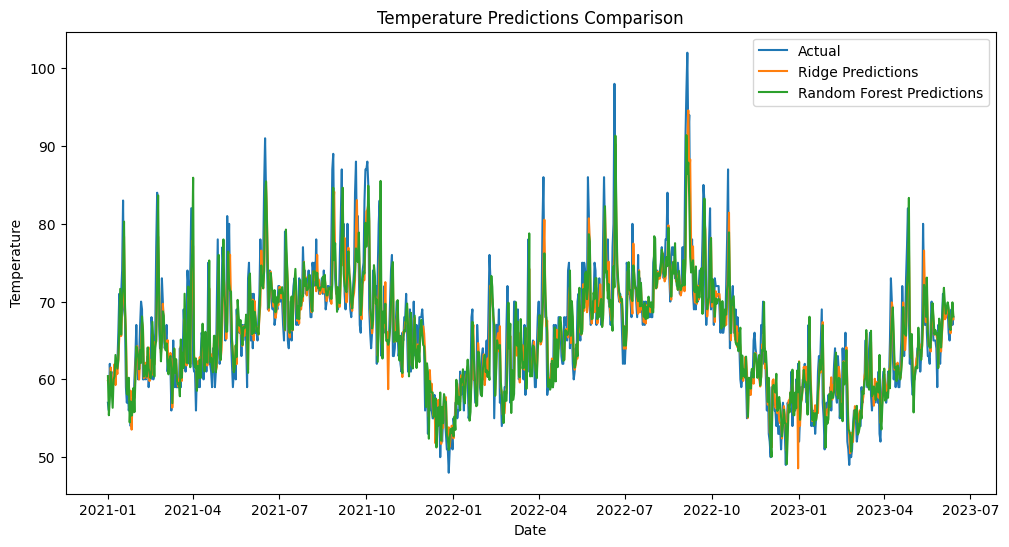

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(combined_ridge.index, combined_ridge["actual"], label="Actual")
plt.plot(combined_ridge.index, combined_ridge["predictions"], label="Ridge Predictions")
plt.plot(combined_rf.index, combined_rf["predictions"], label="Random Forest Predictions")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Temperature Predictions Comparison")
plt.legend()
plt.show()

In this section, the predictions of both Ridge Regression and Random Forest models are visualized using matplotlib. The actual temperature values, along with the predictions, are plotted over time for comparison.

In [33]:
# Calculate Accuracy for both models
def calculate_accuracy(predictions, actual):
    return 1 - (sum((predictions - actual)**2) / len(actual)) / (sum((actual - actual.mean())**2) / len(actual))


In [34]:
ridge_accuracy = calculate_accuracy(ridge_predictions, test["target"])
rf_accuracy = calculate_accuracy(rf_predictions, test["target"])


In [35]:
print("Ridge Regression Accuracy:", ridge_accuracy)
print("Random Forest Accuracy:", rf_accuracy)


Ridge Regression Accuracy: 0.6880056967147679
Random Forest Accuracy: 0.6483166984933365


A function calculate_accuracy is defined to compute the accuracy of the predictions compared to the actual values. The accuracy metric used here is the coefficient of determination (R-squared). The accuracy of both Ridge Regression and Random Forest models is calculated and printed.